**Chatbot project**

**This project aims to predict a person's answer as 'yes' or 'no' based on their stories and questions.**

In [6]:
import numpy as np
import pickle
import os

In [7]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)


In [8]:
all_data = train_data + test_data

In [9]:
vocab = set()
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
vocab.add('yes')
vocab.add('no')
vocab_len = len(vocab) + 1

In [10]:
[len(data[0]) for data in all_data]

[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 ...
 23,
 35,
 47,
 60,
 ...]

In [11]:
max_story_len = max([len(data[0]) for data in all_data])
max_question_len = max([len(data[1]) for data in all_data])

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [14]:
tokenizer.word_index

{'back': 1,
 'no': 2,
 'picked': 3,
 'football': 4,
 'garden': 5,
 'went': 6,
 'dropped': 7,
 'discarded': 8,
 '?': 9,
 'travelled': 10,
 'milk': 11,
 'moved': 12,
 'bathroom': 13,
 'apple': 14,
 'down': 15,
 'hallway': 16,
 'put': 17,
 'the': 18,
 'is': 19,
 'took': 20,
 'to': 21,
 'journeyed': 22,
 'mary': 23,
 'in': 24,
 'john': 25,
 'bedroom': 26,
 'left': 27,
 'sandra': 28,
 '.': 29,
 'daniel': 30,
 'kitchen': 31,
 'yes': 32,
 'up': 33,
 'grabbed': 34,
 'office': 35,
 'there': 36,
 'got': 37}

In [28]:
train_story_text = []
train_question_text = []
train_answers = []

In [29]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [35]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [39]:
train_story_seq[:10]
#Converting each word to its matching word index using texts to sequences method

[[23, 12, 21, 18, 13, 29, 28, 22, 21, 18, 26, 29],
 [23,
  12,
  21,
  18,
  13,
  29,
  28,
  22,
  21,
  18,
  26,
  29,
  23,
  6,
  1,
  21,
  18,
  26,
  29,
  30,
  6,
  1,
  21,
  18,
  16,
  29],
 [23,
  12,
  21,
  18,
  13,
  29,
  28,
  22,
  21,
  18,
  26,
  29,
  23,
  6,
  1,
  21,
  18,
  26,
  29,
  30,
  6,
  1,
  21,
  18,
  16,
  29,
  28,
  6,
  21,
  18,
  31,
  29,
  30,
  6,
  1,
  21,
  18,
  13,
  29],
 [23,
  12,
  21,
  18,
  13,
  29,
  28,
  22,
  21,
  18,
  26,
  29,
  23,
  6,
  1,
  21,
  18,
  26,
  29,
  30,
  6,
  1,
  21,
  18,
  16,
  29,
  28,
  6,
  21,
  18,
  31,
  29,
  30,
  6,
  1,
  21,
  18,
  13,
  29,
  30,
  3,
  33,
  18,
  4,
  36,
  29,
  30,
  6,
  21,
  18,
  26,
  29],
 [23,
  12,
  21,
  18,
  13,
  29,
  28,
  22,
  21,
  18,
  26,
  29,
  23,
  6,
  1,
  21,
  18,
  26,
  29,
  30,
  6,
  1,
  21,
  18,
  16,
  29,
  28,
  6,
  21,
  18,
  31,
  29,
  30,
  6,
  1,
  21,
  18,
  13,
  29,
  30,
  3,
  33,
  18,
  4,
  36,
  29

In [43]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_question_len = max_question_len):
    #STORIES X 
    X = []
    #QUESTIONS Xq
    Xq = []
    #CORRECT ANSWER Yes/No
    Y = []
    for story,query,answer in data:
        # for each story
        # [23,12,21,18,13]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y)

In [45]:
inputs_train , queries_train , answers_train = vectorize_stories(train_data)

In [46]:
inputs_test , queries_test , answers_test = vectorize_stories(test_data)

In [47]:
inputs_test

array([[ 0,  0,  0, ..., 18, 26, 29],
       [ 0,  0,  0, ..., 18,  5, 29],
       [ 0,  0,  0, ..., 18,  5, 29],
       ...,
       [ 0,  0,  0, ..., 18, 14, 29],
       [ 0,  0,  0, ..., 18,  5, 29],
       [ 0,  0,  0, ..., 14, 36, 29]])

In [48]:
answers_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
tokenizer.word_index['yes']

32

In [50]:
sum(answers_test)

array([  0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0.,   0.,   0.,   0.,   0.])

In [54]:
from tensorflow.keras.models import Sequential,Model
from keras.layers import Embedding
from tensorflow.keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [55]:
#PLACEHOLDER shape(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [56]:
vocab_size = len(vocab) + 1

In [57]:
#INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
#(samples,story_maxlen,embedding_dim)

In [58]:
#INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
#(samples,story_maxlen,question_maxlen)

In [60]:
#QUESTION ENCODER
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# (samples,query_maxlen,embedding_dim)

In [62]:
#ENCODER(INPUT) ---> ENCODED
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [63]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [65]:
answer = concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [66]:
answer = LSTM(32)(answer)

In [67]:
answer = Dropout(0.5)(answer)

In [68]:
answer = Dense(vocab_size)(answer) # (samples,vocab_size) YES/NO

In [69]:
answer = Activation('softmax')(answer)

In [71]:
model = Model([input_sequence,question],answer)

In [73]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [77]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=120,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/120
313/313 [==============================] - 7s 22ms/step - loss: 0.6947 - accuracy: 0.5050 - val_loss: 0.7008 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 8s 24ms/step - loss: 0.6950 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 8s 24ms/step - loss: 0.6945 - accuracy: 0.5024 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 8s 24ms/step - loss: 0.6943 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 7s 24ms/step - loss: 0.6946 - accuracy: 0.5003 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/120
313/313 [==============================] - 7s 24ms/step - loss: 0.6942 - accuracy: 0.5004 - val_loss: 0.6953 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 8s 24ms/step - loss: 0.6942 - accuracy: 0.5051 - val_loss: 0.6950 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


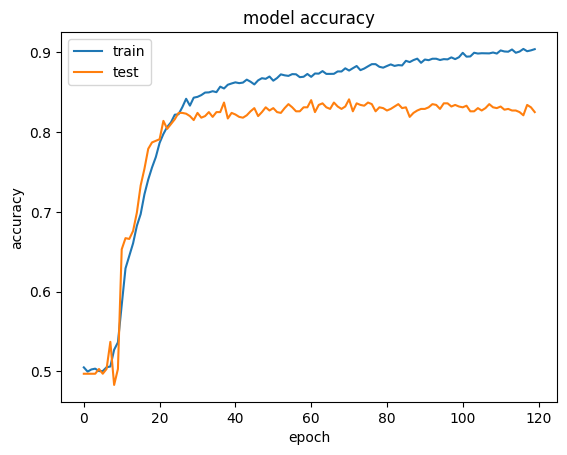

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 10ms/step


In [86]:
val_max = np.argmax(pred_results[0])

In [87]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [88]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [89]:
test_data[0][2]

'no'

In [90]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [91]:
k

'no'

In [93]:
pred_results[0][val_max] #Our model is %99 sure about the answer

0.9999627

**Creating my own story**

In [94]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [95]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [96]:
my_question = "Is the football in the garden ?"

In [97]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [98]:
my_data = [(my_story.split(),my_question.split(),'yes')]

In [99]:
my_story,my_quest,my_ans = vectorize_stories(my_data)

In [104]:
pred_results = model.predict(([my_story,my_quest]))

1/1 [==============================] - 0s 47ms/step


In [105]:
val_max = np.argmax(pred_results[0])

In [106]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [107]:
k

'yes'

In [108]:
pred_results[0][val_max]

0.9933838